## Importing Libraries

In [552]:
import geocoder
from geopy.geocoders import Nominatim
import folium
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_latlong(district):
    address = "Brazil,Sao Paulo,Região Metropolitana de São Paulo {}".format(district)
    geolocator = Nominatim(user_agent="SP")
    location = geolocator.geocode(address)
    print(location)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

### Getting Lat and Long for São Paulo state --> Used for maps

In [3]:
address = "Sao Paulo, Brazil"
geolocator = Nominatim(user_agent="SP")
location = geolocator.geocode(address)
print(location)
lat_sp = location.latitude
lon_sp = location.longitude
print(lat_sp,lon_sp)

São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
-23.5506507 -46.6333824


In [4]:
wiki_url = 'https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o'
postals = requests.get(wiki_url).text
postals_frame = pd.read_html(wiki_url,flavor='bs4')[1] #Second value represents second table, which contains all Districts

In [5]:
#Drop unnecessary columns
postals_frame.drop(columns=['Posição','Unnamed: 3'],inplace=True)
#Drop null/nan rows
postals_frame.dropna(inplace=True)

In [6]:
postals_frame['Latitude'] = np.nan
postals_frame['Longitude'] = np.nan

In [7]:
postals_frame.head()

,Distrito,População 2010,Latitude,Longitude
0,Grajaú,360.787,NaN,NaN
1,Jardim Ângela,295.434,NaN,NaN
2,Sapopemba,284.524,NaN,NaN
3,Capão Redondo,268.729,NaN,NaN
4,Jardim São Luís,267.871,NaN,NaN


### Rank of most populated Districts/Neighborhood in São Paulo

Text(0.5, 1.0, 'Top 20 most populated Districts in São Paulo')

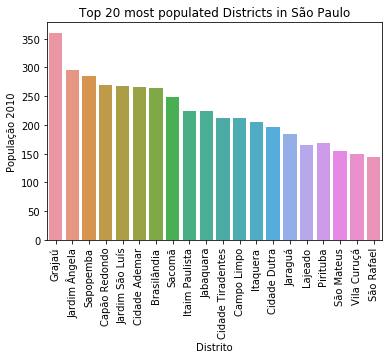

In [183]:
g = sns.barplot(x='Distrito', y='População 2010',data=postals_frame.head(20),)
plt.xticks(rotation=90)
plt.title('Top 20 most populated Districts in São Paulo')

### Gather geo data by using the geopy API

In [8]:
for idx,district in enumerate(postals_frame['Distrito']):
    lat,long = get_latlong(district)
    postals_frame.loc[idx,'Latitude'] = lat
    postals_frame.loc[idx,'Longitude'] = long
        

Grajaú, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Jardim Ângela, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Sapopemba, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Capão Redondo, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Jardim São Luís, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Cidade Ademar, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região

Vila Prudente, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Guaianases, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Campo Grande, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Raposo Tavares, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
Tucuruvi, 100, Avenida Doutor Antônio Maria Laet, Tucuruvi, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, 02304-002, Brasil
Vila Formosa, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Re

Marsilac, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil


In [9]:
#Filter out unnacurate districts
postals_frame = postals_frame[(postals_frame['Distrito']!='Tremembé') & (postals_frame['Distrito']!='Pedreira')]

### Map of São Paulo Districts

In [10]:
map_sp = folium.Map(location=[lat_sp, lon_sp], zoom_start=11)

# add markers to map
for lat, lng, label in zip(postals_frame['Latitude'], postals_frame['Longitude'], postals_frame['Distrito']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

### Credentials for Foursquare API

In [11]:
CLIENT_ID = 'none' # your Foursquare ID
CLIENT_SECRET = 'none' # your Foursquare Secret
ACCESS_TOKEN = 'none'
VERSION = '20180605' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value
radius=2000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 15ULQBEOKIAMLP1VW4H3NTURVA3MT21YWKTUT3DMZ000JMES
CLIENT_SECRET:VNADXQ5DOWVXV4OT51LJKRBPVIHENDLVD4SIAO2RGZIONXUR


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


### Gathering data from Foursquare API

In [13]:
saopaulo_venues = getNearbyVenues(names=postals_frame['Distrito'],
                                   latitudes=postals_frame['Latitude'],
                                   longitudes=postals_frame['Longitude']
                                  )

Grajaú
Jardim Ângela
Sapopemba
Capão Redondo
Jardim São Luís
Cidade Ademar
Brasilândia
Sacomã
Itaim Paulista
Jabaquara
Cidade Tiradentes
Campo Limpo
Itaquera
Cidade Dutra
Jaraguá
Lajeado
Pirituba
São Mateus
Vila Curuçá
São Rafael
Cachoeirinha
Vila Jacuí
São Lucas
Freguesia do Ó
Cangaíba
Jardim Helena
Parelheiros
Saúde
Vila Mariana
Vila Medeiros
Penha
Iguatemi
Vila Andrade
Cidade Líder
José Bonifácio
Santana
Rio Pequeno
Ermelino Matarazzo
Vila Maria
Perdizes
Cursino
Vila Sônia
Mandaqui
Ipiranga
Artur Alvim
Vila Matilde
Vila Prudente
Guaianases
Campo Grande
Raposo Tavares
Tucuruvi
Vila Formosa
Jaçanã
Ponte Rasa
Itaim Bibi
São Miguel Paulista
Tatuapé
Aricanduva
Jardim Paulista
Casa Verde
Água Rasa
São Domingos
Santa Cecília
Moema
Carrão
Limão
Perus
Santo Amaro
Bela Vista
Liberdade
Parque do Carmo
Anhanguera
Lapa
Pinheiros
Mooca
Campo Belo
Consolação
Vila Guilherme
Butantã
República
Jaguaré
Morumbi
Belém
Alto de Pinheiros
Vila Leopoldina
Socorro
Cambuci
Bom Retiro
Brás
Jaguara
Sé
Pari
Barr

### View data Neighborhood x Venue to know if data is accurate

Text(0, 0.5, 'Count of Venues')

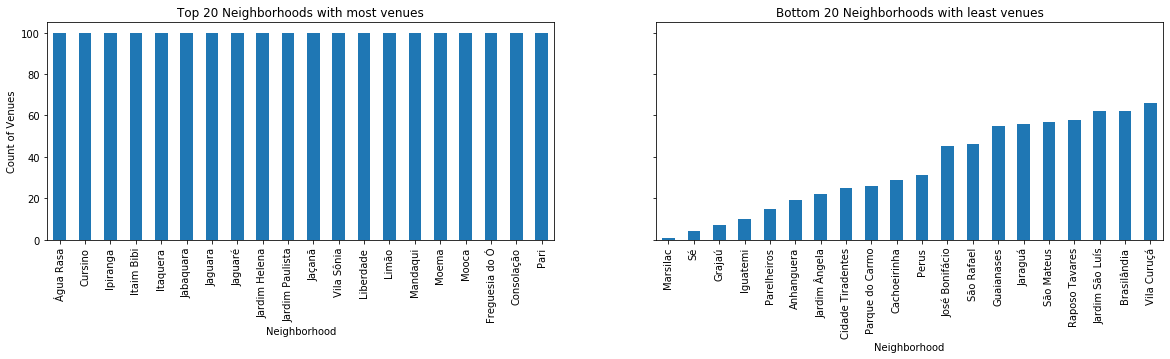

In [160]:
fig,axes= plt.subplots(1,2,sharey=True,figsize=(20,4))

saopaulo_venues.groupby(['Neighborhood'])['Venue']\
.count().sort_values(ascending=False).head(20)\
.plot(ax=axes[0],kind='bar', title='Top 20 Neighborhoods with most venues')


saopaulo_venues.groupby(['Neighborhood'])['Venue']\
.count().sort_values(ascending=True).head(20)\
.plot(ax=axes[1],kind='bar',title='Bottom 20 Neighborhoods with least venues')


axes[0].set_ylabel('Count of Venues')

                                                                                                     

### Data preparation by using One Hot Encoding and grouping by ranks

In [457]:
# one hot encoding
saopaulo_onehot = pd.get_dummies(saopaulo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
saopaulo_onehot['Neighborhood'] = saopaulo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [saopaulo_onehot.columns[-1]] + list(saopaulo_onehot.columns[:-1])
saopaulo_onehot = saopaulo_onehot[fixed_columns]

saopaulo_onehot.head()

,Zoo Exhibit,Acai House,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Arcade,...,Warehouse Store,Watch Shop,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
saopaulo_grouped = saopaulo_onehot.groupby('Neighborhood').mean().reset_index()
saopaulo_grouped

,Neighborhood,Zoo Exhibit,Acai House,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,...,Warehouse Store,Watch Shop,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Alto de Pinheiros,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.0
1,Anhanguera,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
2,Aricanduva,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.01,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.0
3,Artur Alvim,0.00,0.00,0.01,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
4,Barra Funda,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Vila Matilde,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
90,Vila Medeiros,0.00,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
91,Vila Prudente,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.01,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
92,Vila Sônia,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.01,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.0


In [459]:
num_top_venues = 8

for hood in saopaulo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = saopaulo_grouped[saopaulo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alto de Pinheiros----
                  venue  freq
0                 Plaza  0.07
1  Gym / Fitness Center  0.04
2            Restaurant  0.04
3    Athletics & Sports  0.04
4               Dog Run  0.04
5        Clothing Store  0.03
6        Cosmetics Shop  0.02
7                   Spa  0.02


----Anhanguera----
                  venue  freq
0         Grocery Store  0.16
1                Bakery  0.11
2                  Park  0.11
3                   Gym  0.05
4           Pizza Place  0.05
5  Gym / Fitness Center  0.05
6     Convenience Store  0.05
7     Food & Drink Shop  0.05


----Aricanduva----
                  venue  freq
0                Bakery  0.15
1           Pizza Place  0.08
2                  Café  0.04
3  Gym / Fitness Center  0.04
4            Food Truck  0.03
5      Department Store  0.03
6        Clothing Store  0.03
7                   Gym  0.03


----Artur Alvim----
                  venue  freq
0                Bakery  0.09
1           Pizza Place  0.08
2  Gym / F

7       Cosmetics Shop  0.03


----Jardim Paulista----
                  venue  freq
0    Italian Restaurant  0.08
1        Ice Cream Shop  0.07
2  Brazilian Restaurant  0.06
3           Coffee Shop  0.05
4            Restaurant  0.04
5           Pizza Place  0.04
6  Gym / Fitness Center  0.03
7                 Hotel  0.03


----Jardim São Luís----
                  venue  freq
0  Gym / Fitness Center  0.10
1                Bakery  0.10
2           Pizza Place  0.08
3  Brazilian Restaurant  0.06
4             Pet Store  0.05
5              Pharmacy  0.05
6        Clothing Store  0.03
7           Snack Place  0.03


----Jardim Ângela----
                     venue  freq
0           Soccer Stadium  0.14
1  Health & Beauty Service  0.09
2              Pizza Place  0.09
3              Coffee Shop  0.05
4        Mobile Phone Shop  0.05
5              Sports Club  0.05
6              Snack Place  0.05
7                Pet Store  0.05


----Jaçanã----
                  venue  freq
0          

7                Bakery  0.04


----Tucuruvi----
                  venue  freq
0           Pizza Place  0.10
1                Bakery  0.07
2                   Bar  0.06
3          Burger Joint  0.05
4             Pet Store  0.05
5  Gym / Fitness Center  0.04
6          Dessert Shop  0.04
7    Italian Restaurant  0.03


----Vila Andrade----
                       venue  freq
0                     Bakery  0.06
1                Pizza Place  0.05
2                     Market  0.04
3                   Pharmacy  0.04
4                  Pet Store  0.04
5        Japanese Restaurant  0.03
6  Middle Eastern Restaurant  0.03
7                 Restaurant  0.03


----Vila Curuçá----
                  venue  freq
0                Bakery  0.09
1  Gym / Fitness Center  0.08
2           Pizza Place  0.06
3         Grocery Store  0.05
4  Brazilian Restaurant  0.05
5           Supermarket  0.05
6                Market  0.05
7              Gym Pool  0.03


----Vila Formosa----
                  venue  fre

In [460]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [461]:


indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = saopaulo_grouped['Neighborhood']

for ind in np.arange(saopaulo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(saopaulo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Alto de Pinheiros,Plaza,Gym / Fitness Center,Restaurant,Dog Run,Athletics & Sports,Clothing Store,Cosmetics Shop,Track
1,Anhanguera,Grocery Store,Bakery,Park,Restaurant,Gym / Fitness Center,Burger Joint,Gym,Skate Park
2,Aricanduva,Bakery,Pizza Place,Café,Gym / Fitness Center,Food Truck,Supermarket,Gym,Clothing Store
3,Artur Alvim,Bakery,Pizza Place,Gym / Fitness Center,Clothing Store,Chocolate Shop,Pharmacy,Gymnastics Gym,Department Store
4,Barra Funda,Pizza Place,Dessert Shop,Motel,Italian Restaurant,Restaurant,Café,Hotel,Pet Store


### Selecting cluster model with Kmeans to get clusters of similar districts

In [462]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 7

saopaulo_grouped_clustering = saopaulo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(saopaulo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 0, 0, 1, 0, 2, 0])

In [463]:
neighborhoods_venues_sorted.rename(columns={'Neighborhood':'Distrito'},inplace=True)

In [464]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

saopaulo_merged = postals_frame

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
saopaulo_merged = saopaulo_merged.join(neighborhoods_venues_sorted.set_index('Distrito'), on='Distrito')

saopaulo_merged.head() # check the last columns!


,Distrito,População 2010,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Grajaú,360.787,-23.785907,-46.665197,6,Bakery,Market,Ice Cream Shop,Historic Site,Food Truck,Gym / Fitness Center,Soccer Stadium,Flower Shop
1,Jardim Ângela,295.434,-23.712528,-46.768720,1,Soccer Stadium,Pizza Place,Health & Beauty Service,Gym,Gym / Fitness Center,Pastelaria,Gift Shop,Pet Store
2,Sapopemba,284.524,-23.604326,-46.509885,2,Bakery,Grocery Store,Gym,Fast Food Restaurant,Gym / Fitness Center,Supermarket,Pizza Place,Snack Place
3,Capão Redondo,268.729,-23.671903,-46.779435,2,Bakery,Grocery Store,Pizza Place,Brazilian Restaurant,Gym,Pharmacy,Sandwich Place,Bar
4,Jardim São Luís,267.871,-23.683573,-46.737762,2,Bakery,Gym / Fitness Center,Pizza Place,Brazilian Restaurant,Pet Store,Pharmacy,Grocery Store,Park


In [465]:
saopaulo_merged['Cluster Labels'] = saopaulo_merged['Cluster Labels'].fillna(0.0).astype(int)

In [506]:
df_colors=df_colors.append({'hex':1,'Cluster':1},ignore_index=True)

### Visualize Districts by cluster

In [561]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
df_colors = pd.DataFrame(columns=['hex','cluster'])

# create map
map_clusters = folium.Map(location=[lat_sp, lon_sp], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(saopaulo_merged['Latitude'], saopaulo_merged['Longitude'], saopaulo_merged['Distrito'], saopaulo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    df_colors=df_colors.append({'hex':rainbow[cluster-1],'cluster':cluster},ignore_index=True)
       
map_clusters

In [565]:
df_colors.drop_duplicates(subset=['hex','cluster'],keep='first',inplace=True)
df_colors=df_colors.reset_index().drop(columns='index')
display(df_colors)

,hex,cluster
0,#ff7e41,6
1,#8000ff,1
2,#2c7ef7,2
3,#ff0000,0
4,#d4dd80,5
5,#2adddd,3
6,#80ffb4,4


In [566]:
hex_names={'#ff7e41':'Orange','#8000ff':'Purple','#2c7ef7':'Blue','#ff0000':'Red','#d4dd80':'Light Yellow','#2adddd':'Light blue',
'#80ffb4':'Light green'}
df_col = pd.DataFrame(list(hex_names.items()),columns = ['hex','color_name']) 
display(df_col)
df_colors = pd.merge(df_colors,df_col,how='inner',on='hex')
display(df_colors)

,hex,color_name
0,#ff7e41,Orange
1,#8000ff,Purple
2,#2c7ef7,Blue
3,#ff0000,Red
4,#d4dd80,Light Yellow
5,#2adddd,Light blue
6,#80ffb4,Light green


,hex,cluster,color_name
0,#ff7e41,6,Orange
1,#8000ff,1,Purple
2,#2c7ef7,2,Blue
3,#ff0000,0,Red
4,#d4dd80,5,Light Yellow
5,#2adddd,3,Light blue
6,#80ffb4,4,Light green


In [567]:
#Get column names to filter on visualizations
col_names=saopaulo_merged[saopaulo_merged['Cluster Labels']==0].iloc[:,5:].columns

### Break the Cluster into dataframes to visualize Most commom venues

* Get data by cluster and break into different dataframes for visualization

In [568]:
saopaulo_merged[saopaulo_merged['Cluster Labels']==0].head()

,Distrito,População 2010,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
27,Jardim Helena,135.043,-23.550390,-46.633081,0,Japanese Restaurant,Grocery Store,Cultural Center,Bakery,Theater,Italian Restaurant,Gift Shop,Middle Eastern Restaurant
56,Itaim Bibi,92.570,-23.584381,-46.678444,0,Italian Restaurant,Japanese Restaurant,Bar,Burger Joint,Steakhouse,Hotel,Ice Cream Shop,Restaurant
60,Jardim Paulista,88.692,-23.567435,-46.663692,0,Italian Restaurant,Ice Cream Shop,Brazilian Restaurant,Coffee Shop,Pizza Place,Restaurant,Spanish Restaurant,Hotel
64,Santa Cecília,83.717,-23.529660,-46.651894,0,Pizza Place,Italian Restaurant,Café,Brazilian Restaurant,Theater,Middle Eastern Restaurant,Restaurant,Gym / Fitness Center
70,Bela Vista,69.460,-23.562210,-46.647766,0,Coffee Shop,Ice Cream Shop,Brazilian Restaurant,Hotel,Gym / Fitness Center,Pizza Place,Cultural Center,Bookstore


In [569]:
cluster=[]
cluster_total=[]
for cl in range(kclusters):
    #List for cluster analysis
    cluster.append(saopaulo_merged[saopaulo_merged['Cluster Labels']==cl].iloc[:,5:].\
        melt(var_name='Venue_col',value_name='Type').\
        groupby(['Venue_col','Type']).size())
    cluster[cl] = cluster[cl].to_frame(name = 'count').reset_index()    
    
    #Another list of cluster for totals
    cluster_total.append(saopaulo_merged[saopaulo_merged['Cluster Labels']==cl].iloc[:,5:].\
        melt(var_name='Venue_col',value_name='Type')['Type'].value_counts().reset_index())


# Visualizations

## Cluster[0] - Cluster 1 - Red

* First Visualization is about Top Count by Cluster
* Second Visualizations is Top Count by Common Venues

Text(0, 0.5, 'Count of Venue')

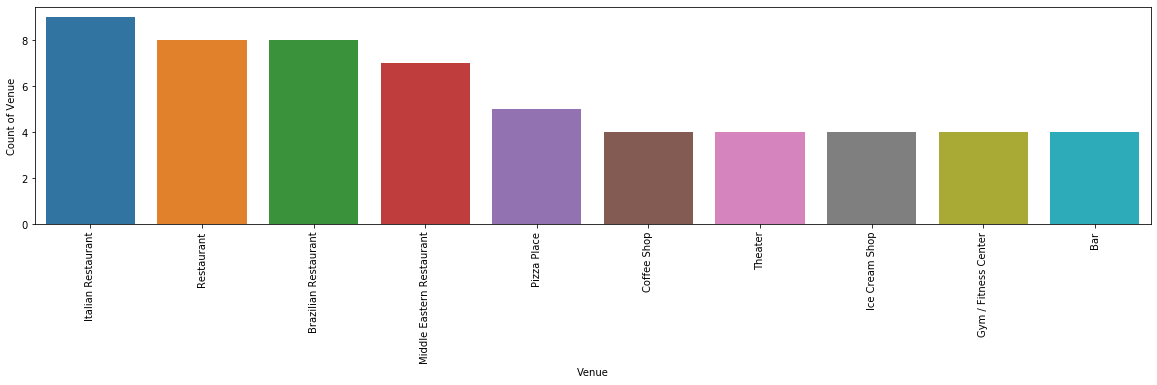

In [570]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[0].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

([<matplotlib.axis.YTick at 0x1d9338e8c08>,
 <a list of 0 Text yticklabel objects>)

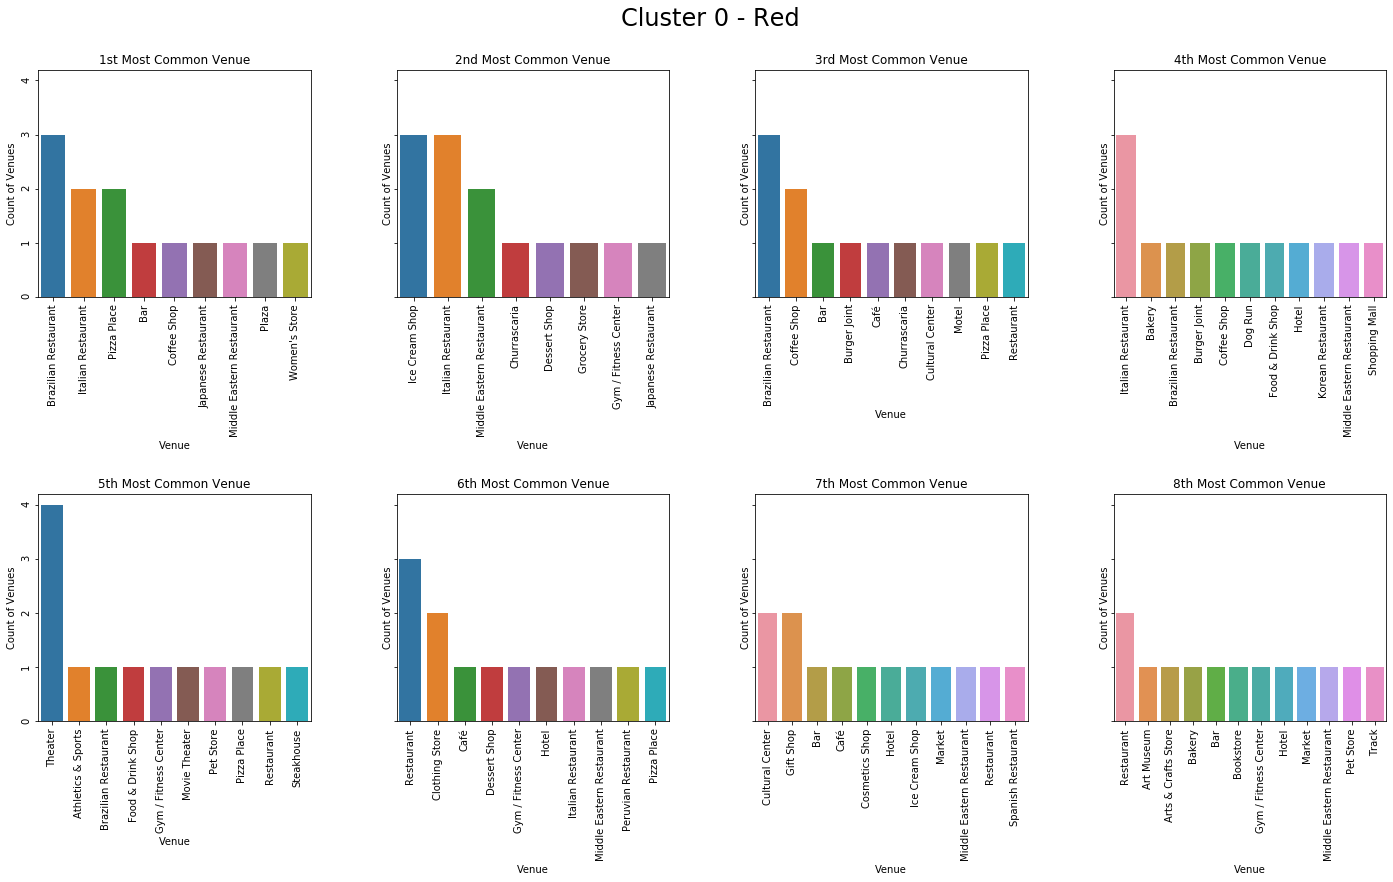

In [587]:
fig,axes=plt.subplots(2,4,figsize=(20,10),sharey=True)
for idx,grade in enumerate(cluster[0]['Venue_col'].unique()):
    if idx<4:
        sns.barplot(x='Type',y='count',data=cluster[0][cluster[0]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[0,idx])
        axes[0,idx].set_title(grade)
    else:
        count=4
        sns.barplot(x='Type',y='count',data=cluster[0][cluster[0]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[1,idx-count])
        axes[1,idx-count].set_title(grade)
        count=count+1
        
fig.tight_layout(h_pad=15)
fig.suptitle('Cluster 0 - Red',fontsize='24',y=1.05)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel('Count of Venues')
    ax.set_xlabel('Venue')
    
        
plt.yticks(range(0,5))

## Cluster[1] - Cluster 2 - Purple

Text(0, 0.5, 'Count of Venue')

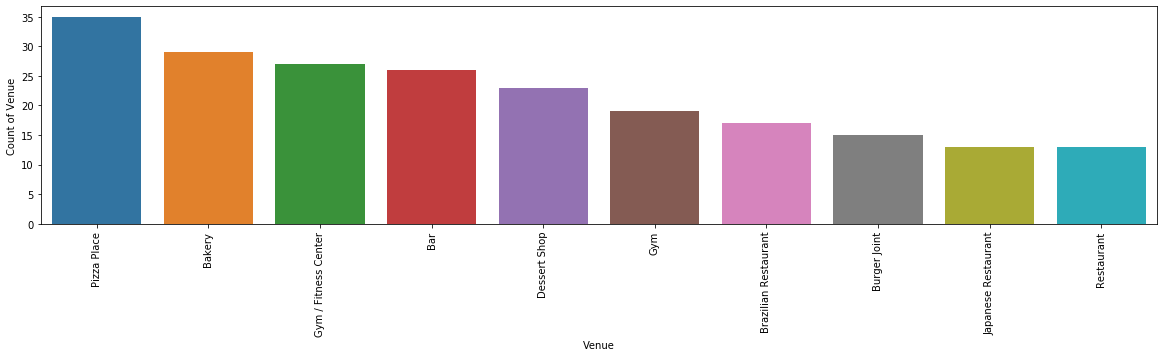

In [572]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[1].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

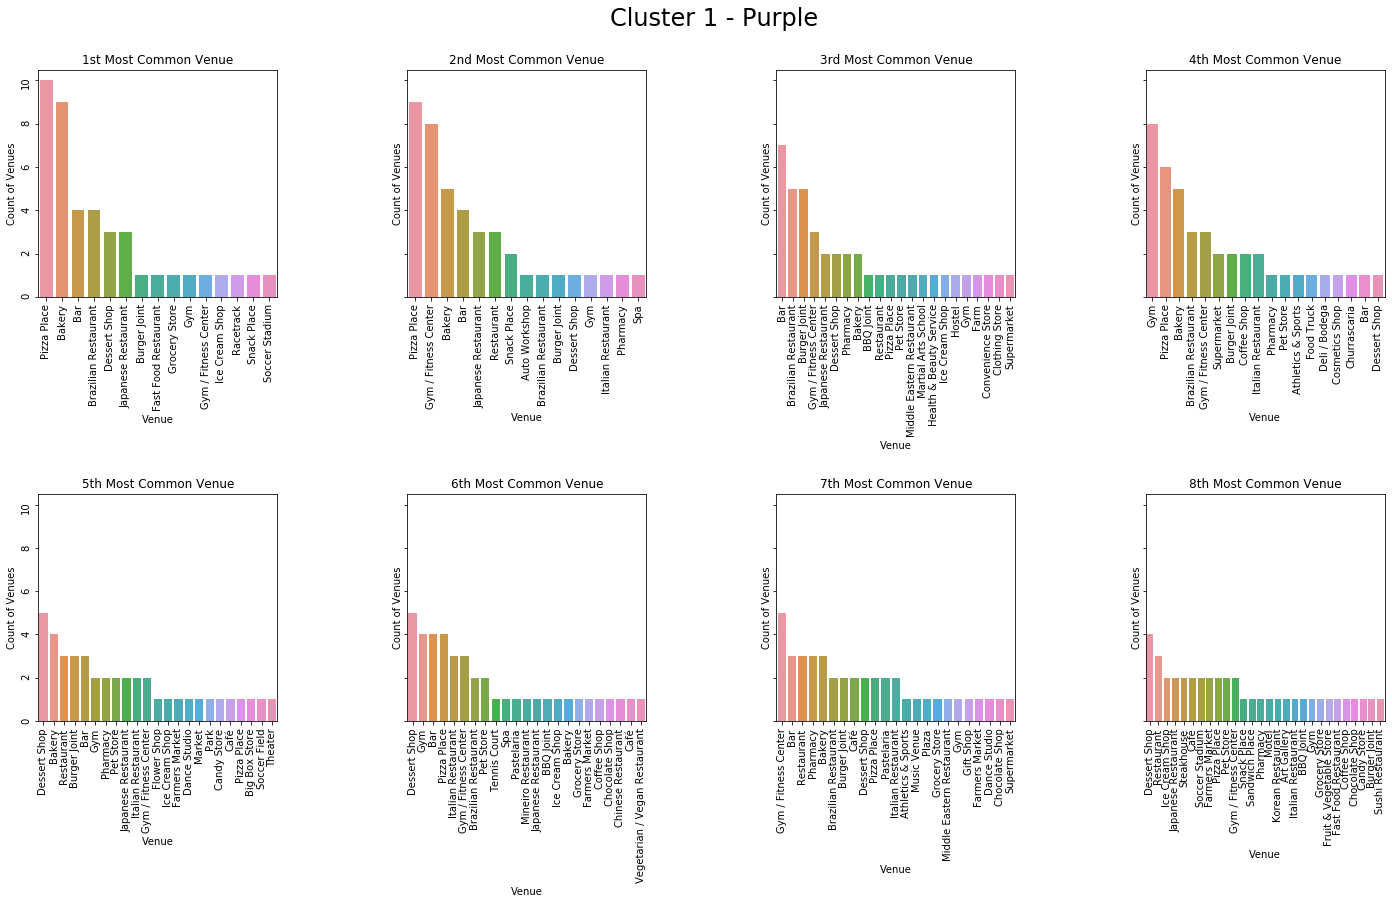

In [588]:
fig,axes=plt.subplots(2,4,figsize=(20,10),sharey=True)
for idx,grade in enumerate(cluster[1]['Venue_col'].unique()):
    if idx<4:
        sns.barplot(x='Type',y='count',data=cluster[1][cluster[1]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[0,idx])
        axes[0,idx].set_title(grade)
    else:
        count=4
        sns.barplot(x='Type',y='count',data=cluster[1][cluster[1]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[1,idx-count])
        axes[1,idx-count].set_title(grade)
        count=count+1
        
fig.tight_layout(h_pad=15)
fig.suptitle('Cluster 1 - Purple',fontsize='24',y=1.05)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel('Count of Venues')
    ax.set_xlabel('Venue')
    
        


## Cluster[2] - Cluster 3 - Blue

Text(0, 0.5, 'Count of Venue')

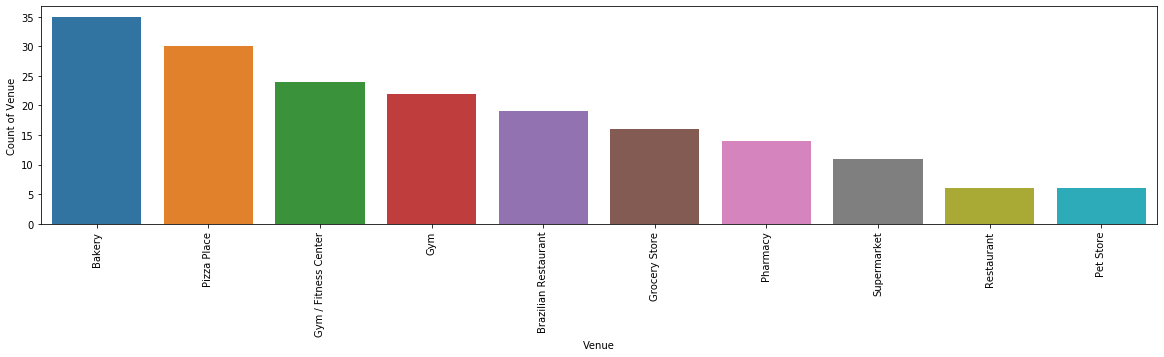

In [574]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[2].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

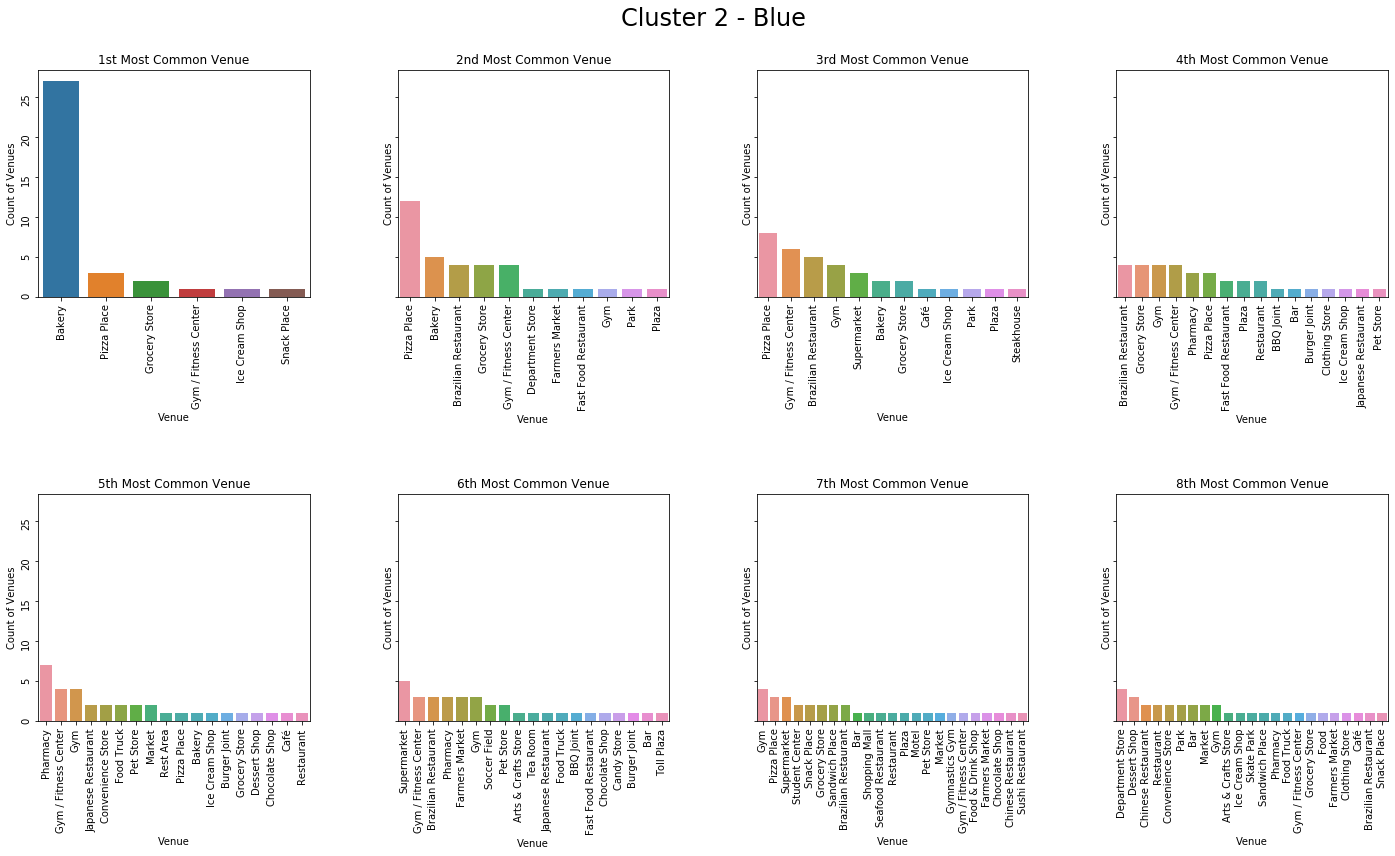

In [589]:
fig,axes=plt.subplots(2,4,figsize=(20,10),sharey=True)
for idx,grade in enumerate(cluster[2]['Venue_col'].unique()):
    if idx<4:
        sns.barplot(x='Type',y='count',data=cluster[2][cluster[2]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[0,idx])
        axes[0,idx].set_title(grade)
    else:
        count=4
        sns.barplot(x='Type',y='count',data=cluster[2][cluster[2]['Venue_col']==grade].sort_values(by='count',ascending=False),ax=axes[1,idx-count])
        axes[1,idx-count].set_title(grade)
        count=count+1
        
fig.tight_layout(h_pad=15)
fig.suptitle('Cluster 2 - Blue',fontsize='24',y=1.05)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel('Count of Venues')
    ax.set_xlabel('Venue')
    
        

## Cluster[3] - Cluster 4 - Light Blue

Text(0, 0.5, 'Count of Venue')

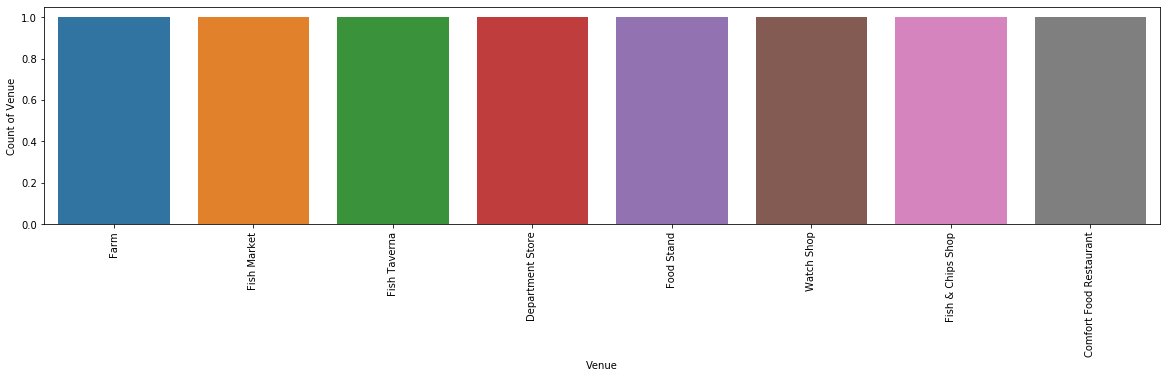

In [576]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[3].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

## Cluster[4] - Cluster 5 - Light Green

Text(0, 0.5, 'Count of Venue')

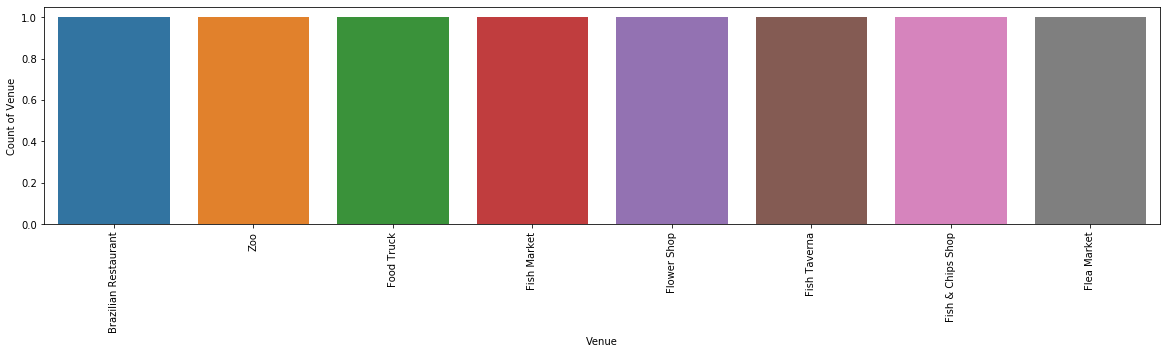

In [577]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[4].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

## Cluster[5] - Cluster 6 - Light Yellow

Text(0, 0.5, 'Count of Venue')

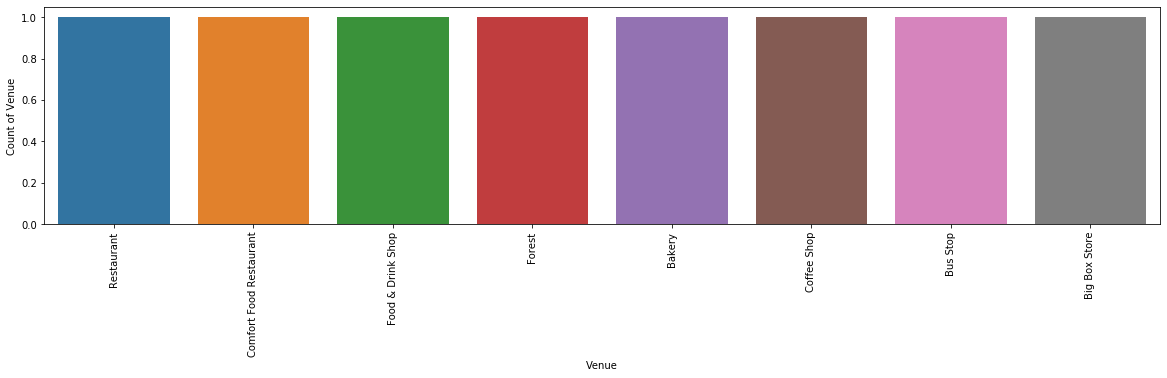

In [578]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[5].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

## Cluster[6] - Cluster 7 - Orange

Text(0, 0.5, 'Count of Venue')

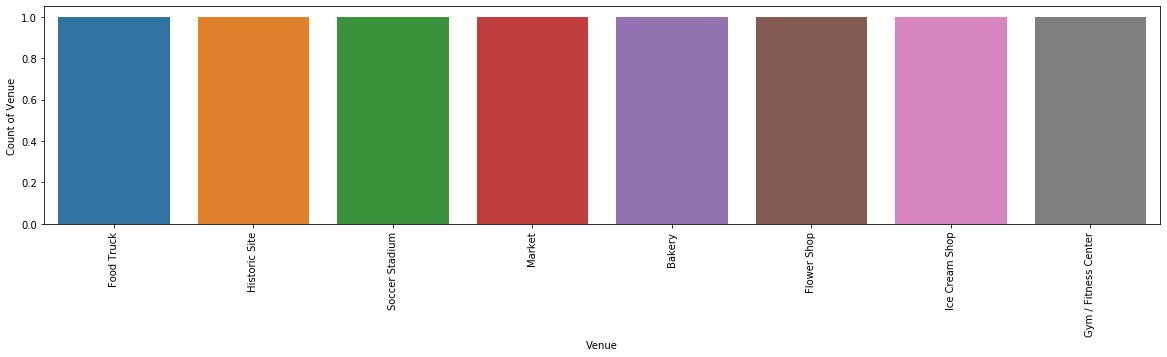

In [579]:
fix,ax = plt.subplots(figsize=(20,4))
g = sns.barplot(x='index',y='Type',data=cluster_total[6].head(10))
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Count of Venue')

### Made by Lucas Hosoya

https://github.com/ShigueruHosoya

### @ February 2021